## Supervised Learning: Challenge

During this challenge, we will be working on the credit card fraud prediction. Available to download [here](https://drive.google.com/file/d/102F1yO4uhUZ-TONJheSiXYWUgBDCoIjA/view?usp=sharing). The data is originally from [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

> #### Warning
> There is a huge class imbalance ratio so we need to be careful when evaluating. It might be better to use method `.predict_proba()` with custom cut-off to search for fraudelent transactions.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import ExtraTreeClassifier

In [35]:
df =pd.read_csv('./credit_card/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [57]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [58]:
model = ExtraTreeClassifier()
model.fit(x,y)


ExtraTreeClassifier()

In [59]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape

(227845, 30)

In [62]:
svc_clf = SVC(probability=True)
svc_clf.fit(x_train,y_train)
preds = svc_clf._predict_proba(x_test)
preds

array([[0.9983471 , 0.0016529 ],
       [0.99808875, 0.00191125],
       [0.99801799, 0.00198201],
       ...,
       [0.99808829, 0.00191171],
       [0.99818325, 0.00181675],
       [0.99802495, 0.00197505]])

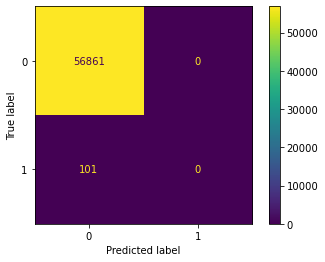

In [63]:
metrics.plot_confusion_matrix(svc_clf, x_test, y_test)

In [64]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

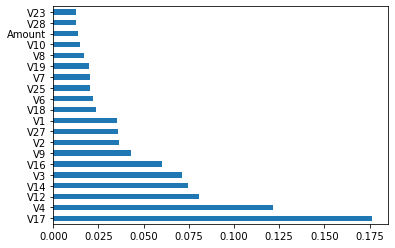

In [43]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

In [44]:
rnd_clf = ensemble.RandomForestClassifier()
rnd_clf.fit(x_train,y_train)
preds1 = rnd_clf.predict(x_test)
acc2= metrics.accuracy_score(y_test,preds1)
acc2

0.9994908886626171

Oversampling

In [67]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
osv = RandomOverSampler(0.75)
x_train_os, y_train_os = osv.fit_sample(x_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_os)))

C:\Users\asus\anaconda3\envs\school\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 227454, 1: 391})
The number of classes after fit Counter({0: 227454, 1: 170590})


In [68]:
clf = ensemble.RandomForestClassifier()
clf.fit(x_train_os,y_train_os)
y_pred = clf.predict(x_test)
accur = metrics.accuracy_score(y_test,y_pred)
accur

0.9995435553526912

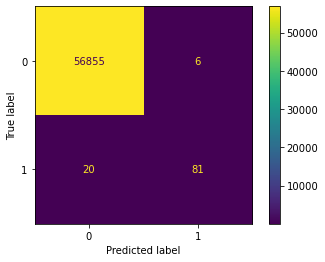

In [76]:
metrics.plot_confusion_matrix(clf, x_test,y_test)

Undersampling

In [73]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.26)
x_train_ns, y_train_ns = ns.fit_sample(x_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_ns)))

C:\Users\asus\anaconda3\envs\school\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.26 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 227454, 1: 391})
The number of classes after fit Counter({0: 1503, 1: 391})


In [74]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(x_train_ns,y_train_ns)
y_predic = log_clf.predict(x_test)
accur1 = metrics.accuracy_score(y_test,y_predic)
accur1

C:\Users\asus\anaconda3\envs\school\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9375899722622099

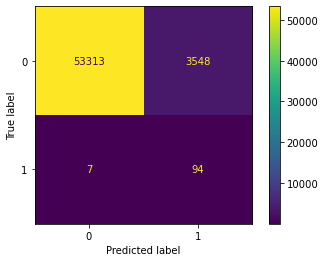

In [75]:
metrics.plot_confusion_matrix(log_clf,x_test,y_test)